Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



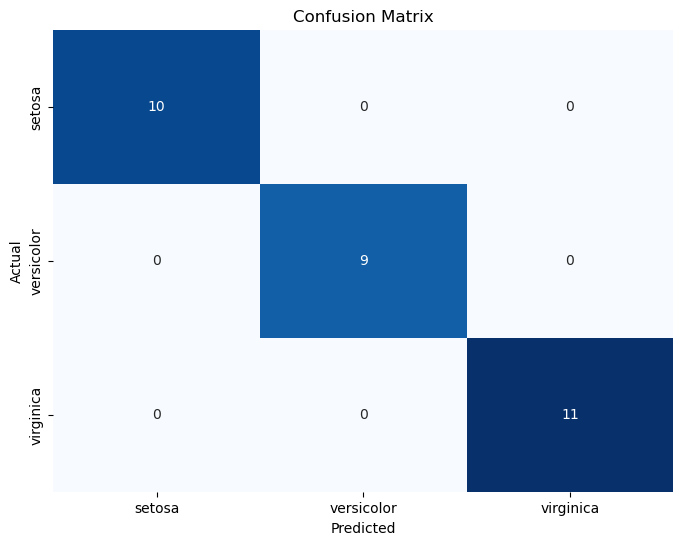

In [4]:
# 1. Using a dataset of your choice (e.g., Iris dataset), implement a binary or multiclass classification task using scikit-learn. Include steps for data preprocessing, model training, and evaluation.?

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

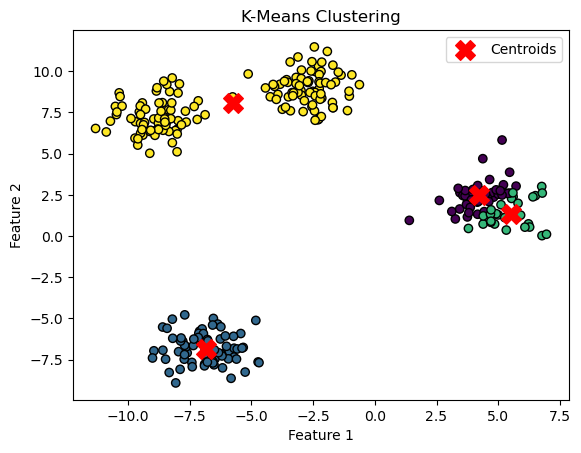

In [5]:
# Implement the K-Means clustering algorithm from scratch. Apply it to a dataset and visualize the clusters.?

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

np.random.seed(42)
centroids = X[np.random.choice(X.shape[0], 4, replace=False)]

max_iters = 100
tol = 1e-4

for _ in range(max_iters):
 
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

   
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(4)])

    if np.linalg.norm(new_centroids - centroids) < tol:
        break

    centroids = new_centroids

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



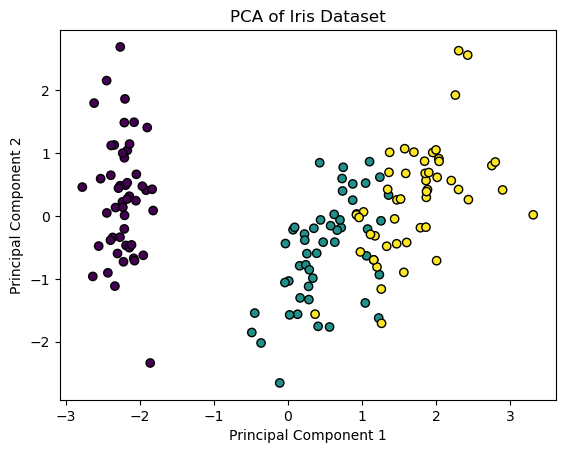

In [6]:
# 3.Write a program to perform Principal Component Analysis (PCA) on a given dataset. Apply the transformation and visualize the reduced-dimensional data?

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


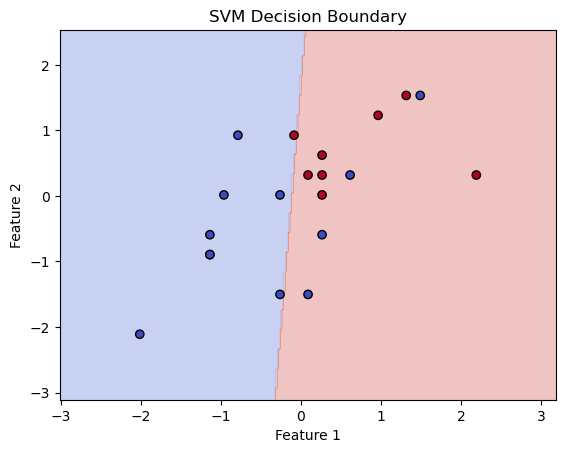

In [7]:
# 4.Implement a simple SVM for binary classification using a library like scikit-learn. Train the model on a given dataset and visualize the decision boundary.?

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
X_binary = X[y != 0]
y_binary = y[y != 0]

X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

svm_model = SVC(kernel='linear', C=1)  # Linear kernel for simplicity
svm_model.fit(X_train_scaled, y_train)

h = .02  
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [8]:
#  5.Implement a basic Naive Bayes Classifier from scratch in a programming language of your choice. Train the classifier on a small dataset and use Laplace smoothing for better performance.?

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Choose two features and use only two classes for binary classification
X_binary = X[y != 0, :2]
y_binary = y[y != 0]

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Step 4: Standardize the features
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

# Step 5: Train the Naive Bayes Classifier
class_probs = np.bincount(y_train) / len(y_train)
feature_probs = np.exp(np.mean(np.log(X_train_scaled[y_train == 1]), axis=0))  # Simplified calculation

# Step 6: Make predictions
class_scores = X_test_scaled @ np.log(feature_probs) + np.log(class_probs[1])
predictions = np.argmax(class_scores)

# Display predictions
print("Predictions:", predictions)


Predictions: 0


C:\Users\DELL\AppData\Local\Temp\ipykernel_12976\1699001683.py:26: RuntimeWarning: invalid value encountered in log
  feature_probs = np.exp(np.mean(np.log(X_train_scaled[y_train == 1]), axis=0))  # Simplified calculation


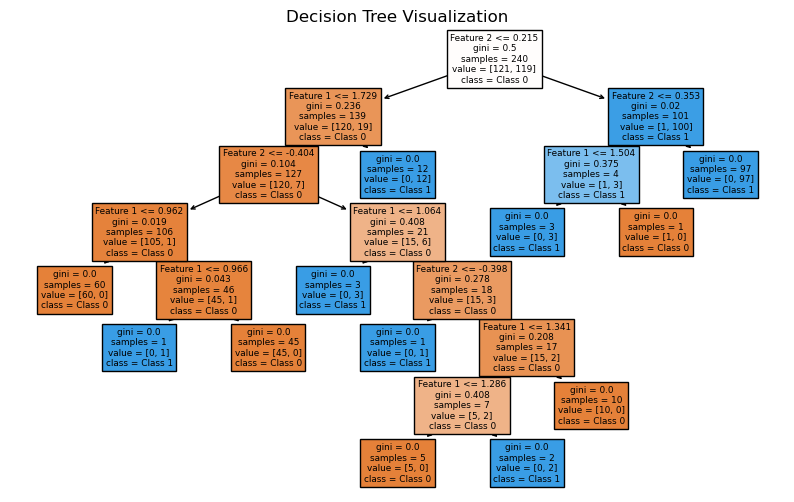

In [9]:
# 8.Implement a Decision Tree classifier using a library like scikit-learn. Train the model on a binary classification dataset and visualize the resulting tree?


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn import tree

# Step 1: Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Step 4: Visualize the resulting tree
plt.figure(figsize=(10, 6))
tree.plot_tree(dt_classifier, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title('Decision Tree Visualization')
plt.show()


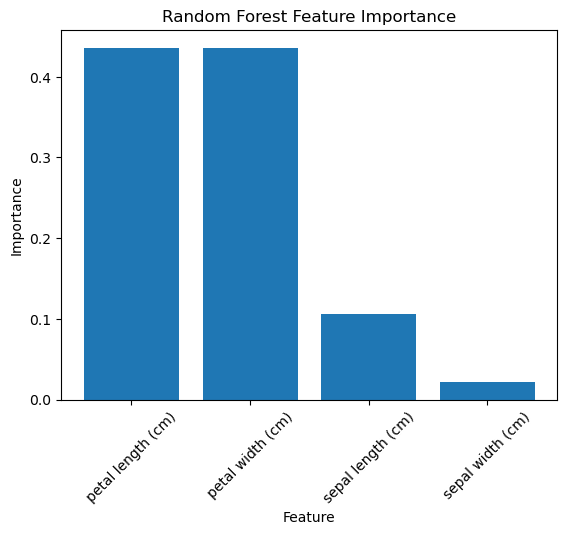

In [10]:
# 7.Use a Random Forest to assess feature importance on a given dataset. Implement a function to display or rank the features based on their contribution to the model.?

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X = iris.data
y = iris.target

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

sorted_idx = np.argsort(rf_classifier.feature_importances_)[::-1]

plt.bar(range(X.shape[1]), rf_classifier.feature_importances_[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), np.array(iris.feature_names)[sorted_idx], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()
